In [1]:
# Run in bioconda environment

#Import helpful packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from Bio import AlignIO

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Helvetica'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.linewidth'] = 0.5
matplotlib.rcParams['xtick.major.width'] = 0.5
matplotlib.rcParams['ytick.major.width'] = 0.5

matplotlib.rcParams['patch.force_edgecolor'] = True
matplotlib.rcParams['patch.linewidth'] = 0.5


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Figure 2A

In [2]:

RNA_alignment = AlignIO.read("ncRNA_alignment.fasta", 'fasta')

In [3]:
# calculate conservation as difference in entropy from maximum entropy
alignment = np.array(RNA_alignment)
alignment_nogap = alignment[:,alignment[0]!='-'] #first row is the reference sequence
conservation = np.zeros(alignment_nogap.shape[1])
for base in ['A','T','C','G']:
    freq = np.sum(alignment_nogap==base, axis=0)/44
    freq[freq==0] = 0.00001 # to avoid log of 0
    conservation += freq * np.log2(freq)
conservation += 2

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


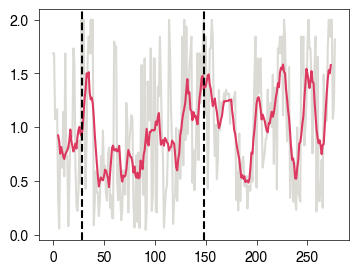

In [6]:
fig, ax = plt.subplots(figsize=(4,3))

ax.plot(conservation, color="#DBDAD5")
moving_average_window = 5
sliding_average = np.empty(len(conservation))
sliding_average[:] = np.nan
for i in range(len(conservation)):
    if i-moving_average_window >= 0 and i+moving_average_window <= len(conservation):
        sliding_average[i] = np.average(conservation[i-moving_average_window:i+moving_average_window])
ax.plot(sliding_average, color="#DC3860")
ax.axvline(28, linestyle='--', color='k')
ax.axvline(148, linestyle='--', color='k')
plt.savefig("Fig2A.pdf", transparent=True)